In [ ]:
try:
  # This command only in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.losses import SparseCategoricalCrossentropy

import os
import numpy as np
import matplotlib.pyplot as plt

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
# Get project files
#!wget https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip

#!unzip cats_and_dogs.zip

PATH = 'cats_and_dogs'

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test')

# Get number of files in each directory. The train and validation directories
# each have the subdirecories "dogs" and "cats".
total_train = sum([len(files) for root, directory, files in os.walk(train_dir)])
total_val = sum([len(files) for root, directory, files in os.walk(validation_dir)])
total_test = len(os.listdir(test_dir))

# Variables for pre-processing and training.
BATCH_SIZE = 128
EPOCHS = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [ ]:
# 3. ImageDataGenerator for training, validation, and testing with augmentations
train_image_generator = ImageDataGenerator(rescale = 1./255)
validation_image_generator = ImageDataGenerator(rescale = 1./255)
test_image_generator = ImageDataGenerator(rescale = 1./255)

# Generate the data for training, validation, and testing
train_data_gen = train_image_generator.flow_from_directory(
    directory=train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

val_data_gen = validation_image_generator.flow_from_directory(
    directory=validation_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

test_data_gen = test_image_generator.flow_from_directory(
    directory=PATH,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='input',
    classes=['test'],
    shuffle=False
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 50 images belonging to 1 classes.


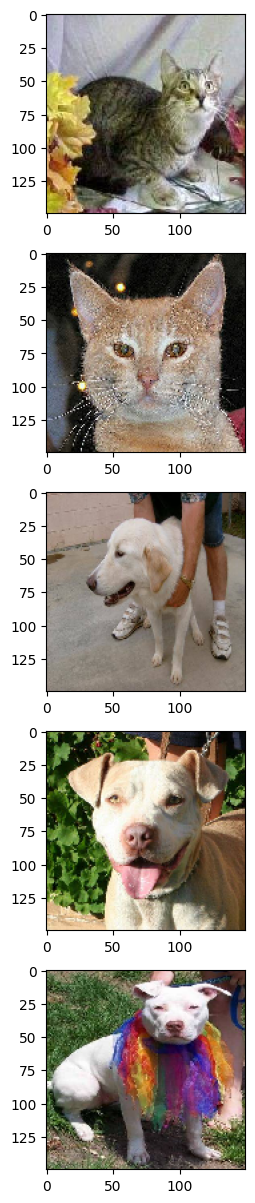

In [ ]:
# 4
def plotImages(images_arr, probabilities = False):
    figure, axes = plt.subplots(
      ncols=1,
      nrows=len(images_arr),
      figsize=(5, len(images_arr) * 3)
    )

    if probabilities is False:
      for image, axe in zip(images_arr, axes):
          axe.axis('on')
          axe.imshow(image)

    else:
      for image, probability, axe in zip(images_arr, probabilities, axes):
          axe.imshow(image)
          axe.axis('off')
          if probability > 0.5:
              axe.set_title("%.2f" % (probability*100) + "% dog")
          else:
              axe.set_title("%.2f" % ((1-probability)*100) + "% cat")

    plt.show()

sample_training_images, _ = next(train_data_gen)
plotImages(sample_training_images[:5])

In [ ]:
# 5
train_image_generator = ImageDataGenerator(
    rotation_range=45,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    rescale = 1./255
)

Found 2000 images belonging to 2 classes.


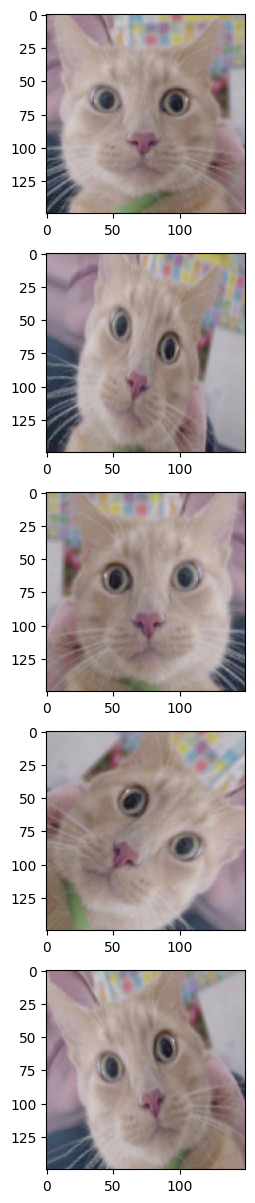

In [ ]:
# 6
train_data_gen = train_image_generator.flow_from_directory(
  batch_size=BATCH_SIZE,
  directory=train_dir,
  target_size=(IMG_HEIGHT, IMG_WIDTH),
  class_mode='binary'
)

augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [ ]:
# 7

# Create a Sequential model for image classification
model = Sequential()

# Add 3 convolutional layers and pooling to extract features from images
model.add(
  Conv2D(32, (3, 3),
  activation='relu',
  input_shape=(IMG_HEIGHT, IMG_WIDTH, 3))
)
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Flatten the output and add dense layers for classification
model.add(Flatten())
model.add(Dense(64))
model.add(Dense(2))

# Compile the model with Adam optimizer and binary cross-entropy loss
model.compile(
    optimizer='adam',
    loss=SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

# Display the model architecture
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │       2,367,552 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,460,930 (9.39 MB)

 Trainable params: 2,460,930 (9.39 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# 8
history = model.fit(
  x = train_data_gen,
  epochs = EPOCHS,
  steps_per_epoch = total_train // BATCH_SIZE,
  validation_data = val_data_gen,
  validation_steps = total_val // BATCH_SIZE,
  verbose = 1
)

Epoch 1/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 124s 8s/step - accuracy: 0.5090 - loss: 1.4339 - val_accuracy: 0.5391 - val_loss: 0.6871
Epoch 2/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.5781 - loss: 0.6860 - val_accuracy: 0.5096 - val_loss: 0.6776
Epoch 3/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 118s 7s/step - accuracy: 0.5410 - loss: 0.6865 - val_accuracy: 0.6250 - val_loss: 0.6824
Epoch 4/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 8s 94ms/step - accuracy: 0.6016 - loss: 0.6837 - val_accuracy: 0.6538 - val_loss: 0.6825
Epoch 5/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 137s 8s/step - accuracy: 0.6008 - loss: 0.6783 - val_accuracy: 0.5804 - val_loss: 0.6645
Epoch 6/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 94ms/step - accuracy: 0.5703 - loss: 0.6580 - val_accuracy: 0.5962 - val_loss: 0.6660
Epoch 7/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 136s 8s/step - accuracy: 0.6075 - loss: 0.6573 - val_accuracy: 0.6027 - val_loss: 0.6543
Epoch 8/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 95ms/step - accuracy: 0.6016 - loss: 0.6617 - val_accuracy: 0.5673 - va

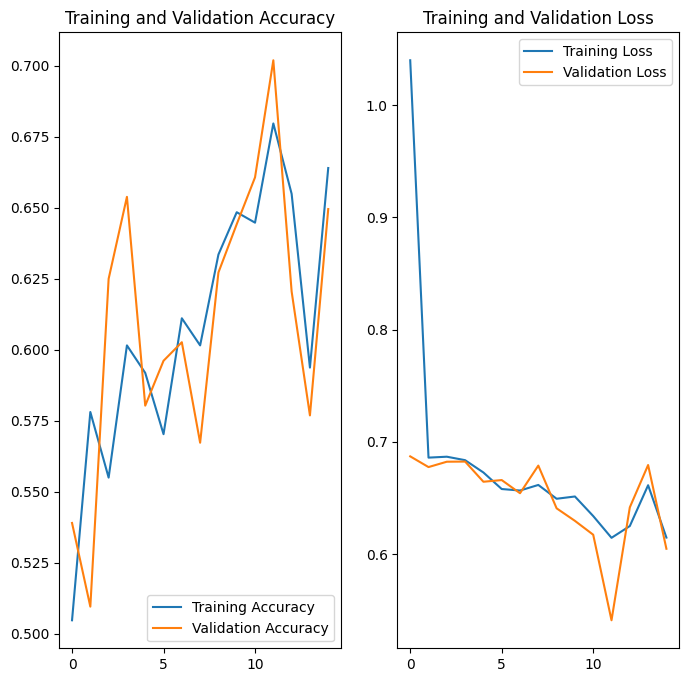

In [ ]:
# 9
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
# 10

predictions = model.predict(test_data_gen)
probabilities = np.argmax(predictions, axis=-1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


In [ ]:
# 11
answers =  [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
            1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
            1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
            1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
            0, 0, 0, 0, 0, 0]
correct = 0

for probability, answer in zip(probabilities, answers):
  if round(probability) == answer:
    correct +=1

percentage_identified = (correct / len(answers)) * 100

passed_challenge = percentage_identified >= 63

print(f"Your model correctly identified {round(percentage_identified, 2)}% of the images of cats and dogs.")

if passed_challenge:
  print("You passed the challenge!")
else:
  print("You haven't passed yet. Your model should identify at least 63% of the images. Keep trying. You will get it!")

Your model correctly identified 68.0% of the images of cats and dogs.
You passed the challenge!
